Title 3.1 : Customer Segmentation - K-Means Clustering vs Logistic Regression.

Name: RAHUL SANATAN BEHARA

Class: M.Sc.DataScience & Big Data Analytics

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
#Load the Dataset
df = pd.read_csv('/content/PRODUCT SALES (2).csv')
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Age_Group_NUMBER,Customer_Gender,Country,Product_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,01-01-17,1,January,2017,17,Youth (<25),1,M,canada,Bikes,2,1519.0,2443.0,1848.0,3038.0,4886.0
1,01-01-17,1,January,2017,23,Youth (<25),1,M,Australia,Bikes,2,1252.0,2295.0,2086.0,2504.0,4590.0
2,01-01-17,1,January,2017,33,Young Adults (25-34),1,F,France,Bikes,2,2171.0,3578.0,2814.0,4342.0,7156.0
3,01-01-17,1,January,2017,39,Adults (35-64),1,M,United States,Bikes,2,713.0,1120.0,814.0,1426.0,2240.0
4,01-01-17,1,January,2017,42,Adults (35-64),1,M,United States,Bikes,2,344.0,540.0,392.0,688.0,1080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,31-12-21,31,December,2021,52,Adults (35-64),1,F,United Kingdom,Bikes,2,1555.0,2443.0,1776.0,3110.0,4886.0
113032,31-12-21,31,December,2021,25,Young Adults (25-34),1,F,Germany,Bikes,1,713.0,1120.0,407.0,713.0,1120.0
113033,31-12-21,31,December,2021,26,Young Adults (25-34),1,M,Australia,Bikes,1,713.0,1120.0,407.0,713.0,1120.0
113034,31-12-21,31,December,2021,33,Young Adults (25-34),1,F,Australia,Bikes,1,1252.0,2295.0,1043.0,1252.0,2295.0


In [ ]:
#Descriptive Statistics
df.describe()

,Day,Year,Customer_Age,Age_Group_NUMBER,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.0,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2019.520153,35.919212,1.0,11.901660,267.296366,452.938427,372.681358,469.318695,842.000053
std,8.781567,1.179704,11.021936,0.0,9.561857,549.835483,922.071219,595.080571,884.866118,1466.202934
min,1.000000,2017.000000,17.000000,1.0,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
25%,8.000000,2019.000000,28.000000,1.0,2.000000,2.000000,5.000000,39.000000,28.000000,70.000000
50%,16.000000,2019.500000,35.000000,1.0,10.000000,9.000000,24.000000,135.000000,108.000000,245.000000
75%,23.000000,2021.000000,43.000000,1.0,20.000000,42.000000,70.000000,432.000000,432.000000,880.000000
max,31.000000,2021.000000,87.000000,1.0,32.000000,2171.000000,3578.000000,26158.000000,42978.000000,69136.000000


In [ ]:
#Check null values:
df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Age_Group_NUMBER    0
Customer_Gender     0
Country             0
Product_Category    0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              113036 non-null  object 
 1   Day               113036 non-null  int64  
 2   Month             113036 non-null  object 
 3   Year              113036 non-null  int64  
 4   Customer_Age      113036 non-null  int64  
 5   Age_Group         113036 non-null  object 
 6   Age_Group_NUMBER  113036 non-null  int64  
 7   Customer_Gender   113036 non-null  object 
 8   Country           113036 non-null  object 
 9   Product_Category  113036 non-null  object 
 10  Order_Quantity    113036 non-null  int64  
 11  Unit_Cost         113036 non-null  float64
 12  Unit_Price        113036 non-null  float64
 13  Profit            113036 non-null  float64
 14  Cost              113036 non-null  float64
 15  Revenue           113036 non-null  float64
dtypes: float64(5), int64

In [ ]:
df.drop('Age_Group_NUMBER',axis = 1,inplace = True)

Text(0, 0.5, 'Frequency')

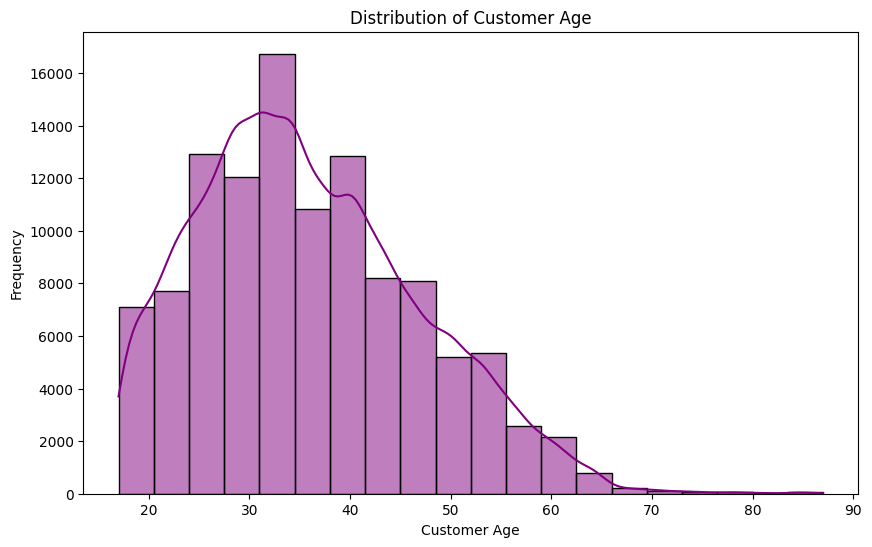

In [ ]:
#Distribution of Age
plt.figure(figsize = (10,6))
sns.histplot(df['Customer_Age'], kde = True, color = 'purple', bins = 20)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')

<ipython-input-11-37acd44a83ee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Customer_Gender',palette = 'Set2')


Text(0.5, 0, 'Gender')

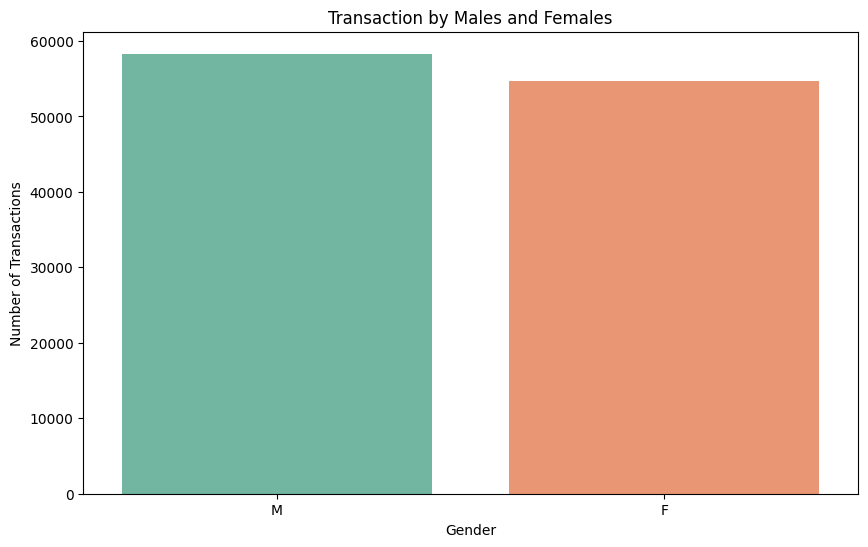

In [ ]:
#Show transaction by males and females
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'Customer_Gender',palette = 'Set2')
plt.title('Transaction by Males and Females')
plt.ylabel('Number of Transactions')
plt.xlabel('Gender')

Text(0.5, 0, 'Product Category')

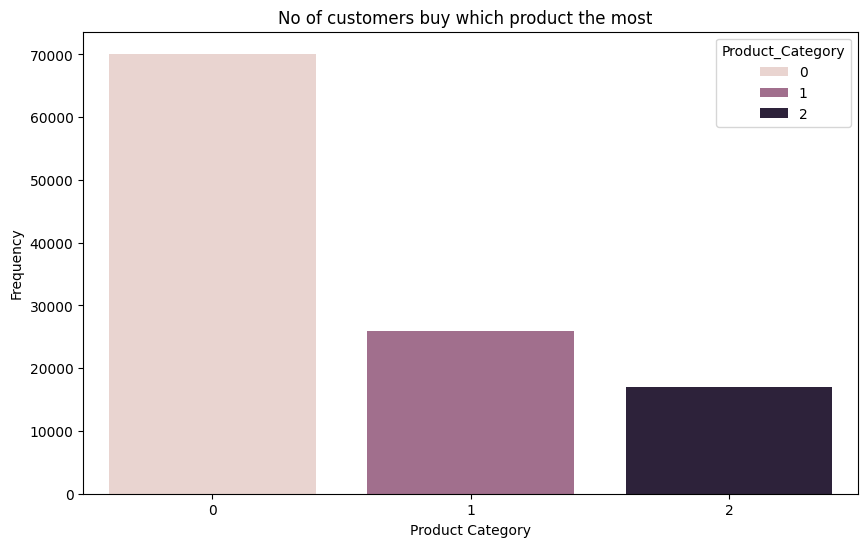

In [ ]:
#Show No of customers buy which product the most
plt.figure(figsize = (10,6))
sns.countplot(data = df ,x = 'Product_Category', hue="Product_Category")
plt.title('No of customers buy which product the most  ')
plt.ylabel('Frequency')
plt.xlabel('Product Category')

In [ ]:
Cust=df['Product_Category'].value_counts()
Cust

Product_Category
0    70120
1    25982
2    16934
Name: count, dtype: int64

<ipython-input-13-fc401c7280ea>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = total_profit, x = 'Product_Category', y = 'Profit', palette='Set2')


Text(0.5, 1.0, 'Total Profit by Product Category')

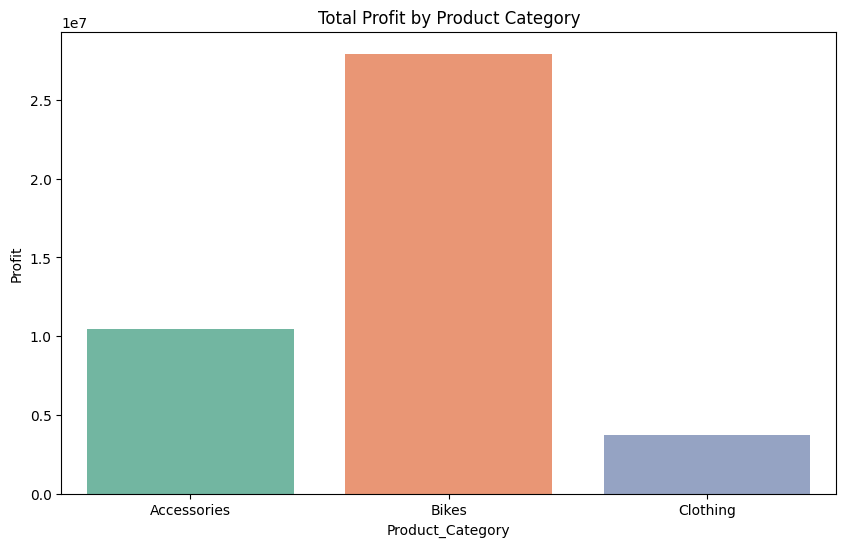

In [ ]:
#Show Total Profit by product category
total_profit = df.groupby('Product_Category')['Profit'].sum().reset_index()

plt.figure(figsize = (10,6))
sns.barplot(data = total_profit, x = 'Product_Category', y = 'Profit', palette='Set2')
plt.title('Total Profit by Product Category')

<ipython-input-14-6c5c06cddf3e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = total_revenue, x= 'Country', y = 'Revenue', palette = 'Set2')


Text(0, 0.5, 'Total Revenue ')

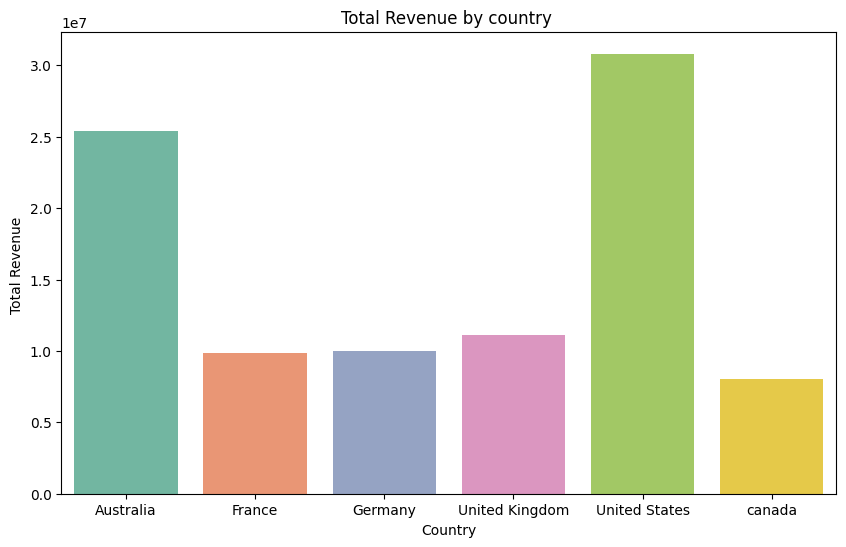

In [ ]:
#Show Total revenue by country
total_revenue = df.groupby('Country')['Revenue'].sum().reset_index()

plt.figure(figsize = (10,6))
sns.barplot(data = total_revenue, x= 'Country', y = 'Revenue', palette = 'Set2')
plt.title('Total Revenue by country ')
plt.xlabel('Country')

plt.ylabel('Total Revenue ')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Age_Group'.
df['Age_Group']= label_encoder.fit_transform(df['Age_Group'])
df['Month']= label_encoder.fit_transform(df['Month'])
df['Customer_Gender']= label_encoder.fit_transform(df['Customer_Gender'])
df['Country']= label_encoder.fit_transform(df['Country'])
df['Product_Category']= label_encoder.fit_transform(df['Product_Category'])

In [ ]:
df['Customer_Gender']

0         1
1         1
2         0
3         1
4         1
         ..
113031    0
113032    0
113033    1
113034    0
113035    1
Name: Customer_Gender, Length: 113036, dtype: int64

In [ ]:
df['Month']

0         4
1         4
2         4
3         4
4         4
         ..
113031    2
113032    2
113033    2
113034    2
113035    2
Name: Month, Length: 113036, dtype: int64

In [ ]:
df['Country']

0         5
1         0
2         1
3         4
4         4
         ..
113031    3
113032    2
113033    0
113034    0
113035    0
Name: Country, Length: 113036, dtype: int64

In [ ]:
df['Product_Category']

0         1
1         1
2         1
3         1
4         1
         ..
113031    1
113032    1
113033    1
113034    1
113035    1
Name: Product_Category, Length: 113036, dtype: int64

<ipython-input-20-c5c2d68d2c4e>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_fill['Date'] = pd.to_datetime(df_fill['Date'])


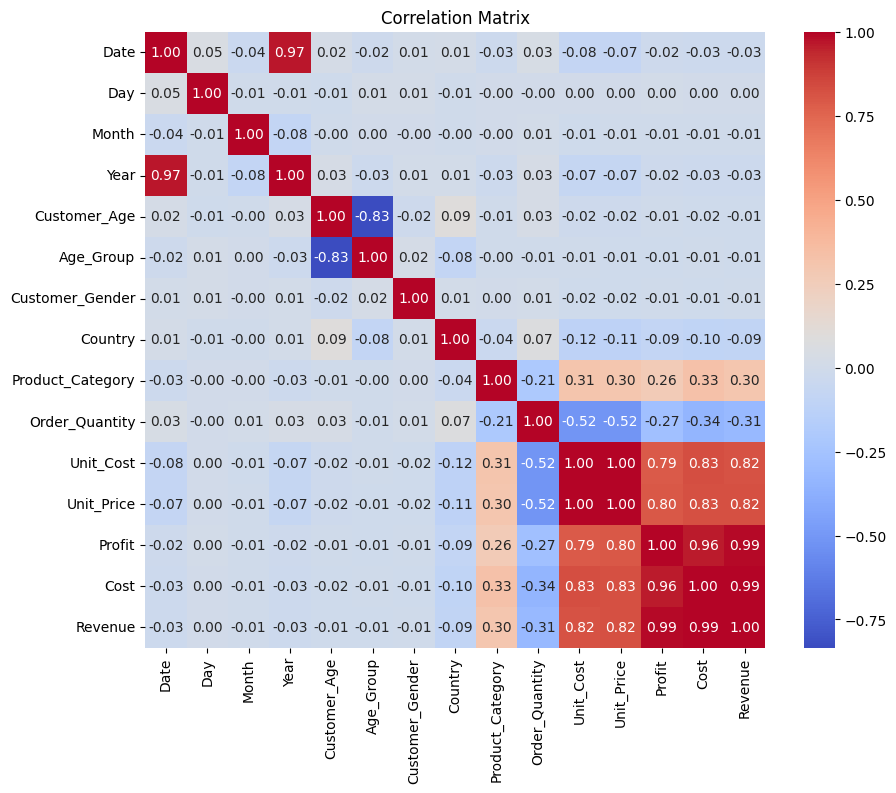

In [ ]:
# Calculate the correlation matrix
df_fill = df.fillna(False)
df_fill['Date'] = pd.to_datetime(df_fill['Date'],format="%d-%m-%Y")
correlation_matrix = df_fill.corr()
#Display
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Importing K means clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Features
features = df[['Customer_Age','Profit','Order_Quantity']]

#Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print(scaled_features)

[[-1.71651295  2.47920238 -1.03554191]
 [-1.17214155  2.87914999 -1.03554191]
 [-0.26485588  4.10251915 -1.03554191]
 ...
 [-0.89995585  0.05767084 -1.14012457]
 [-0.26485588  1.1264384  -1.14012457]
 [ 0.73315835  0.05767084 -1.14012457]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

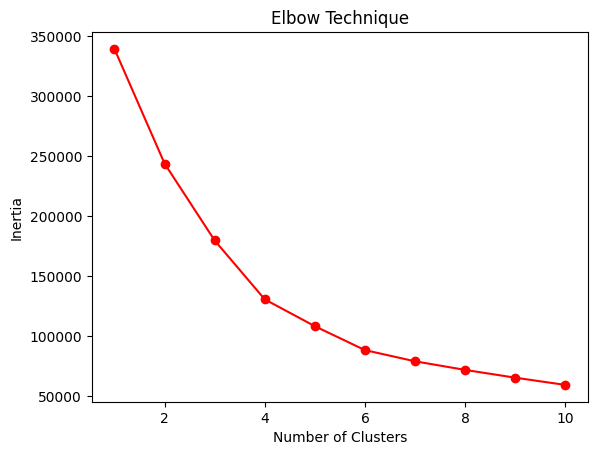

In [ ]:
#using elbow method to find the optimal clusters
sse = []

for i in range(1,11):
  km = KMeans(n_clusters = i, random_state = 45)
  km.fit(scaled_features)
  sse.append(km.inertia_)

plt.plot(range(1,11),sse,marker = 'o',linestyle = '-',color = 'red')
plt.title('Elbow Technique')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [ ]:
#By analyzing the optimal cluster is 4
optimal = 4

#Performing k means cluster model with 4 clusters
km = KMeans(n_clusters=optimal,random_state = 45)
km.fit(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=45)

In [ ]:
km.labels_

array([1, 1, 1, ..., 0, 1, 3], dtype=int32)

In [ ]:
df['Cluster'] = km.labels_

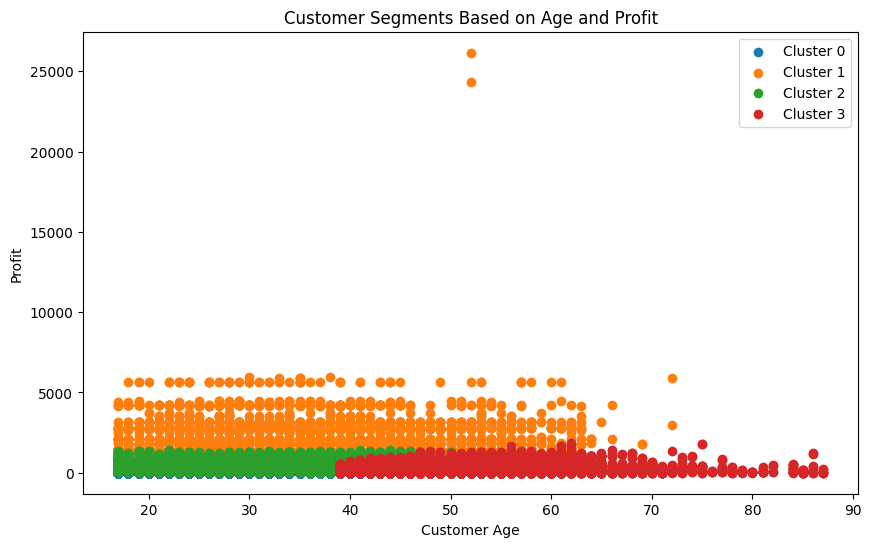

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(optimal):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Customer_Age'], cluster_data['Profit'], label=f'Cluster {i}')
plt.title('Customer Segments Based on Age and Profit')
plt.xlabel('Customer Age')
plt.ylabel('Profit')
plt.legend()
plt.show()


In [ ]:
#Calculate the silhouette score
from sklearn.metrics import silhouette_score
silhouette = []
for i in range(2,6):
  km = KMeans(n_clusters=i , random_state = 45)
  cluster_labels = km.fit_predict(scaled_features)
  silhouette.append(silhouette_score(scaled_features,cluster_labels))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Score')

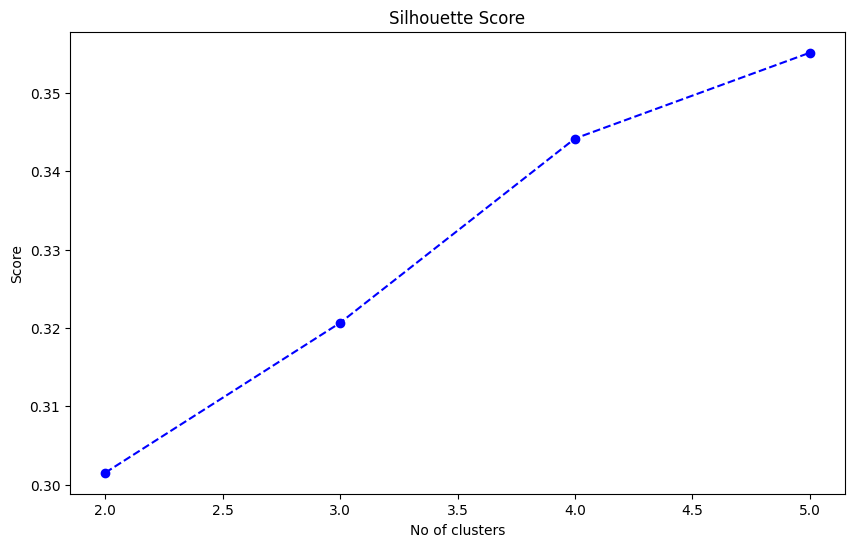

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(2,6),silhouette, marker = 'o', linestyle = '--',color = 'blue')
plt.title('Silhouette Score')
plt.xlabel('No of clusters')
plt.ylabel('Score')

In [ ]:
df['Product_Category'].value_counts()

Product_Category
0    70120
1    25982
2    16934
Name: count, dtype: int64

In [ ]:
df1 = df.copy()

In [ ]:
df1

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,Product_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Cluster
0,01-01-17,1,4,2017,17,3,1,5,1,2,1519.0,2443.0,1848.0,3038.0,4886.0,1
1,01-01-17,1,4,2017,23,3,1,0,1,2,1252.0,2295.0,2086.0,2504.0,4590.0,1
2,01-01-17,1,4,2017,33,2,0,1,1,2,2171.0,3578.0,2814.0,4342.0,7156.0,1
3,01-01-17,1,4,2017,39,0,1,4,1,2,713.0,1120.0,814.0,1426.0,2240.0,1
4,01-01-17,1,4,2017,42,0,1,4,1,2,344.0,540.0,392.0,688.0,1080.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,31-12-21,31,2,2021,52,0,0,3,1,2,1555.0,2443.0,1776.0,3110.0,4886.0,1
113032,31-12-21,31,2,2021,25,2,0,2,1,1,713.0,1120.0,407.0,713.0,1120.0,0
113033,31-12-21,31,2,2021,26,2,1,0,1,1,713.0,1120.0,407.0,713.0,1120.0,0
113034,31-12-21,31,2,2021,33,2,0,0,1,1,1252.0,2295.0,1043.0,1252.0,2295.0,1


In [ ]:
#Making a taget variable
df1['Purchased_Bike'] = np.where(df1['Product_Category'] == 1, 1, 0)

In [ ]:
df1['Purchased_Bike'].value_counts()

Purchased_Bike
0    87054
1    25982
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['Customer_Gender'] = label_encoder.fit_transform(df1['Customer_Gender'])
df1['Product_Category'] = label_encoder.fit_transform(df1['Product_Category'])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# x and y
x = df1[['Customer_Age','Customer_Gender','Product_Category','Order_Quantity']]
y = df1[['Purchased_Bike']]

#Spliting data into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 45)

#Intialize and train the model
lr = LogisticRegression()
lr.fit(x_train,y_train)

#Predict the model
pred1 = lr.predict(x_test)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Accuracy of the model
accuracy = accuracy_score(y_test,pred1)
accuracy

0.9334748761500354

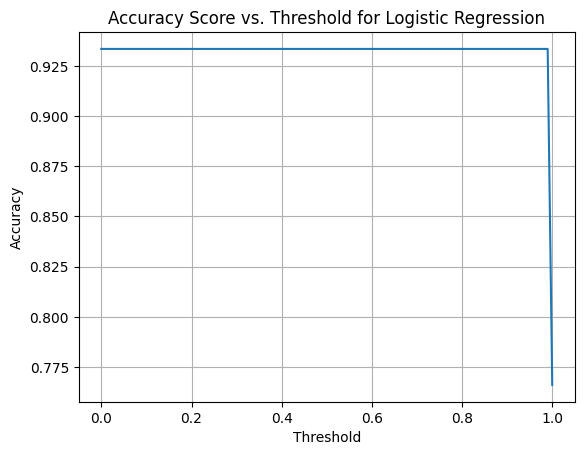

In [ ]:
# Define thresholds to evaluate
thresholds = np.linspace(0, 1, 100)

# Initialize empty lists to store accuracy scores
accuracy_scores = []

# Calculate accuracy for each threshold
for threshold in thresholds:
    y_pred = (pred1 > threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot accuracy scores
plt.plot(thresholds, accuracy_scores)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Score vs. Threshold for Logistic Regression')
plt.grid(True)
plt.show()